Single Variable Linear Regression

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
pay_data=pd.read_csv('Salary_Data.csv')

In [5]:
pay_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
pay_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
pay_data.shape

(30, 2)

In [8]:
pay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [9]:
pay_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Data Visualization

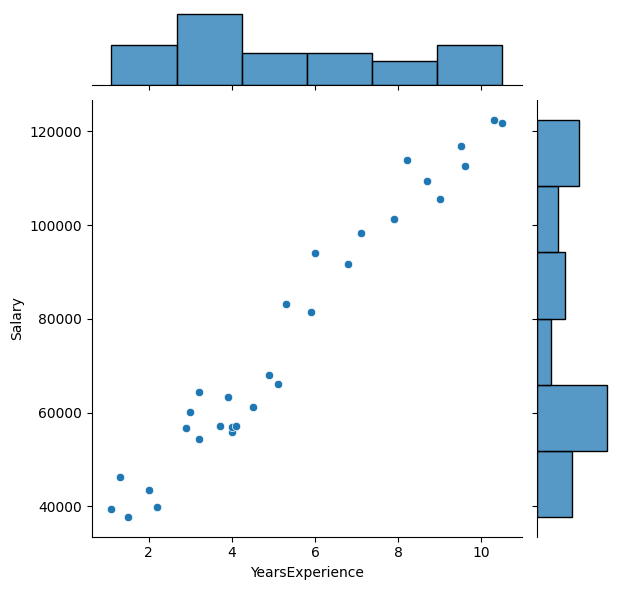

In [10]:
sns.jointplot(x='YearsExperience', y='Salary', data=pay_data)

Divide data into Inputs and Outputs

In [11]:
X=pay_data.iloc[:,:-1]

In [12]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [13]:
Y=pay_data.iloc[:,1]
Y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

Split the dataset into Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)
#When random_state set to an Integer,
#train_test_split will return same results for each execution

In [16]:
len(X_test)

9

In [17]:
len(X_train)

21

In [18]:
len(Y_test)

9

In [19]:
len(Y_train)

21

Fitting Simple Linear Regression to the Training Set

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, Y_train)

LinearRegression()

Prediction

In [23]:
Y_pred=model.predict(X_test)

In [24]:
Y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

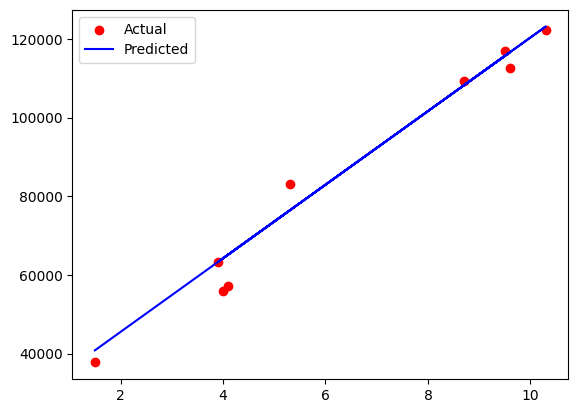

In [25]:
plt.scatter(X_test, Y_test, color='red', label='Actual')
plt.plot(X_test, Y_pred, 'b-', label="Predicted")
plt.legend()
plt.show()

In [26]:
model.intercept_        #value of Y when x=0    [b]

26777.391341197625

In [27]:
model.coef_             #value of the slope[when X changes, Y changes accordingly] or m(slope)

array([9360.26128619])

In [28]:
model.predict([[9.8]])  #predict salary at 9.8yrs of exprerience

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([118507.9519459])

In [29]:
(9360.26128619*9.8)+26777.391341197625      #y=mx+b

118507.95194585963

In [30]:
model.score(X_test, Y_test)                 #R^2[the more the Rsquare the less the error] (It lies b/w 0 to 1)

0.9740993407213511

In [31]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE: ', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(Y_test, Y_pred)))

MAE:  3737.417861878896
MSE:  23370078.800832972
RMSE:  61.134424523985636


Multiple Linear Regression

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
hire=pd.read_csv('hiring.csv')

In [34]:
hire.head()

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,five,8.0,6,45000
2,two,6.0,7,60000
3,seven,10.0,10,65000
4,three,9.0,6,70000


In [37]:
hire.isna().sum()       #checks NaN values

experience         2
test_score         1
interview_score    0
salary             0
dtype: int64

Word2Number Conversion & Usage

In [38]:
#pip install Word2Number
from word2number import w2n

In [39]:
#remove NaN values
hire['experience']=hire.experience.fillna('Zero')

In [42]:
hire['experience']  #or hire.experience

0      Zero
1      five
2       two
3     seven
4     three
5       ten
6    eleven
7      Zero
Name: experience, dtype: object

In [44]:
hire.experience=hire.experience.apply(w2n.word_to_num)
hire.head()

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,5,8.0,6,45000
2,2,6.0,7,60000
3,7,10.0,10,65000
4,3,9.0,6,70000


In [48]:
hire.isnull().sum()

experience         0
test_score         1
interview_score    0
salary             0
dtype: int64

In [50]:
hire[hire['test_score'].isnull()]

,experience,test_score,interview_score,salary
6,11,NaN,7,72000


In [51]:
hire.describe()

,experience,test_score,interview_score,salary
count,8.00000,7.000000,8.000000,8.00000
mean,4.75000,7.857143,7.875000,63000.00000
std,4.26782,1.345185,1.642081,11501.55269
min,0.00000,6.000000,6.000000,45000.00000
25%,1.50000,7.000000,6.750000,57500.00000
50%,4.00000,8.000000,7.500000,63500.00000
75%,7.75000,8.500000,9.250000,70500.00000
max,11.00000,10.000000,10.000000,80000.00000


In [53]:
hire[hire['salary']>60000]

,experience,test_score,interview_score,salary
3,7,10.0,10,65000
4,3,9.0,6,70000
5,10,7.0,10,62000
6,11,NaN,7,72000
7,0,7.0,8,80000


In [55]:
hire.test_score=hire.test_score.fillna(hire.test_score.median())        #put median(8) in NaN 

In [56]:
hire.isnull().sum()

experience         0
test_score         0
interview_score    0
salary             0
dtype: int64

In [57]:
hire.tail()

,experience,test_score,interview_score,salary
3,7,10.0,10,65000
4,3,9.0,6,70000
5,10,7.0,10,62000
6,11,8.0,7,72000
7,0,7.0,8,80000


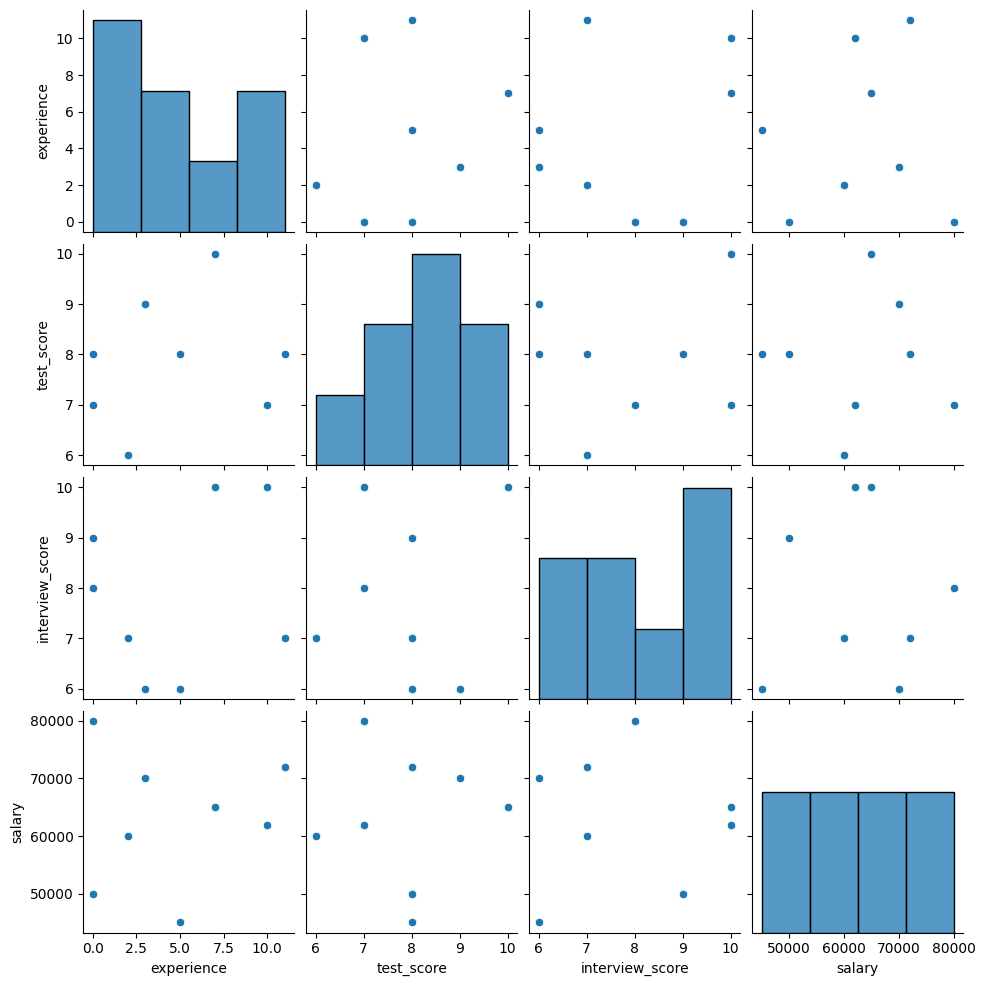

In [58]:
sns.pairplot(hire)

Define features and Responses

In [59]:
X=hire.iloc[:,:-1].values

In [60]:
X

array([[ 0.,  8.,  9.],
       [ 5.,  8.,  6.],
       [ 2.,  6.,  7.],
       [ 7., 10., 10.],
       [ 3.,  9.,  6.],
       [10.,  7., 10.],
       [11.,  8.,  7.],
       [ 0.,  7.,  8.]])

In [61]:
y=hire.iloc[:,[3]].values       #salary
y

array([[50000],
       [45000],
       [60000],
       [65000],
       [70000],
       [62000],
       [72000],
       [80000]], dtype=int64)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=1/4, random_state=10 )

In [63]:
len(X_train)

6

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
reg=LinearRegression()

In [74]:
reg.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred=reg.predict(X_test)
y_pred

array([[76456.14579294],
       [43899.88367584]])

In [76]:
reg.score(X_test, y_test)

-56.28157146012308

In [77]:
reg.intercept_

array([131271.42303218])

In [79]:
reg.coef_

array([[   61.41915471, -6522.91585886, -2257.23148507]])

In [81]:
reg.predict([[15,9,10]])

array([[50914.15277239]])

In [82]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))   #standard deviation

MAE:  18778.131058549836
MSE:  358009821.62576926
RMSE:  137.03332097905908
